In [26]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
raw_wine_data = load_wine()
wine_data = pd.DataFrame(data= np.c_[raw_wine_data['data'], raw_wine_data['target']],
                     columns= raw_wine_data['feature_names'] + ['target'])
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [73]:
# Shuffle the dataset
wine_data_shuffle = wine_data.copy()
wine_data_shuffle = wine_data_shuffle.sample(frac=1)
wine_data_shuffle.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
54,13.74,1.67,2.25,16.4,118.0,2.6,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0.0
14,14.38,1.87,2.38,12.0,102.0,3.3,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0.0
47,13.90,1.68,2.12,16.0,101.0,3.1,3.39,0.21,2.14,6.10,0.91,3.33,985.0,0.0
81,12.72,1.81,2.20,18.8,86.0,2.2,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1.0
56,14.22,1.70,2.30,16.3,118.0,3.2,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0.0


In [3]:
data = load_wine()
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [5]:
wine_data.shape

(178, 14)

In [6]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [80]:
# Check the sum of duplicates values
wine_data.duplicated().sum()

0

In [9]:
# Check if we have missing data
wine_data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
# Let's check to see if we have duplicates values
wine_data.duplicated().sum()

0

In [20]:
# Display the total number of each label
wine_data.target.value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

C:\Users\savadogo_abdoul\Anaconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

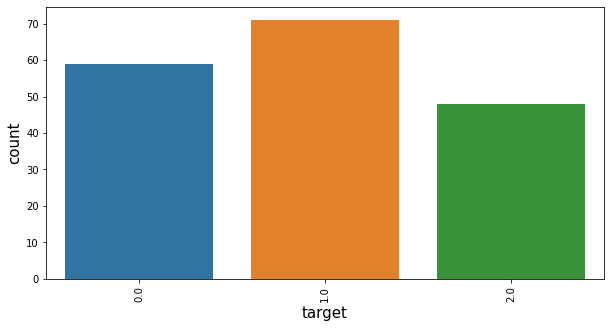

In [29]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(wine_data.target.value_counts().index, wine_data.target.value_counts());
plt.xlabel('target', fontsize=15)
plt.ylabel('count', fontsize=15)

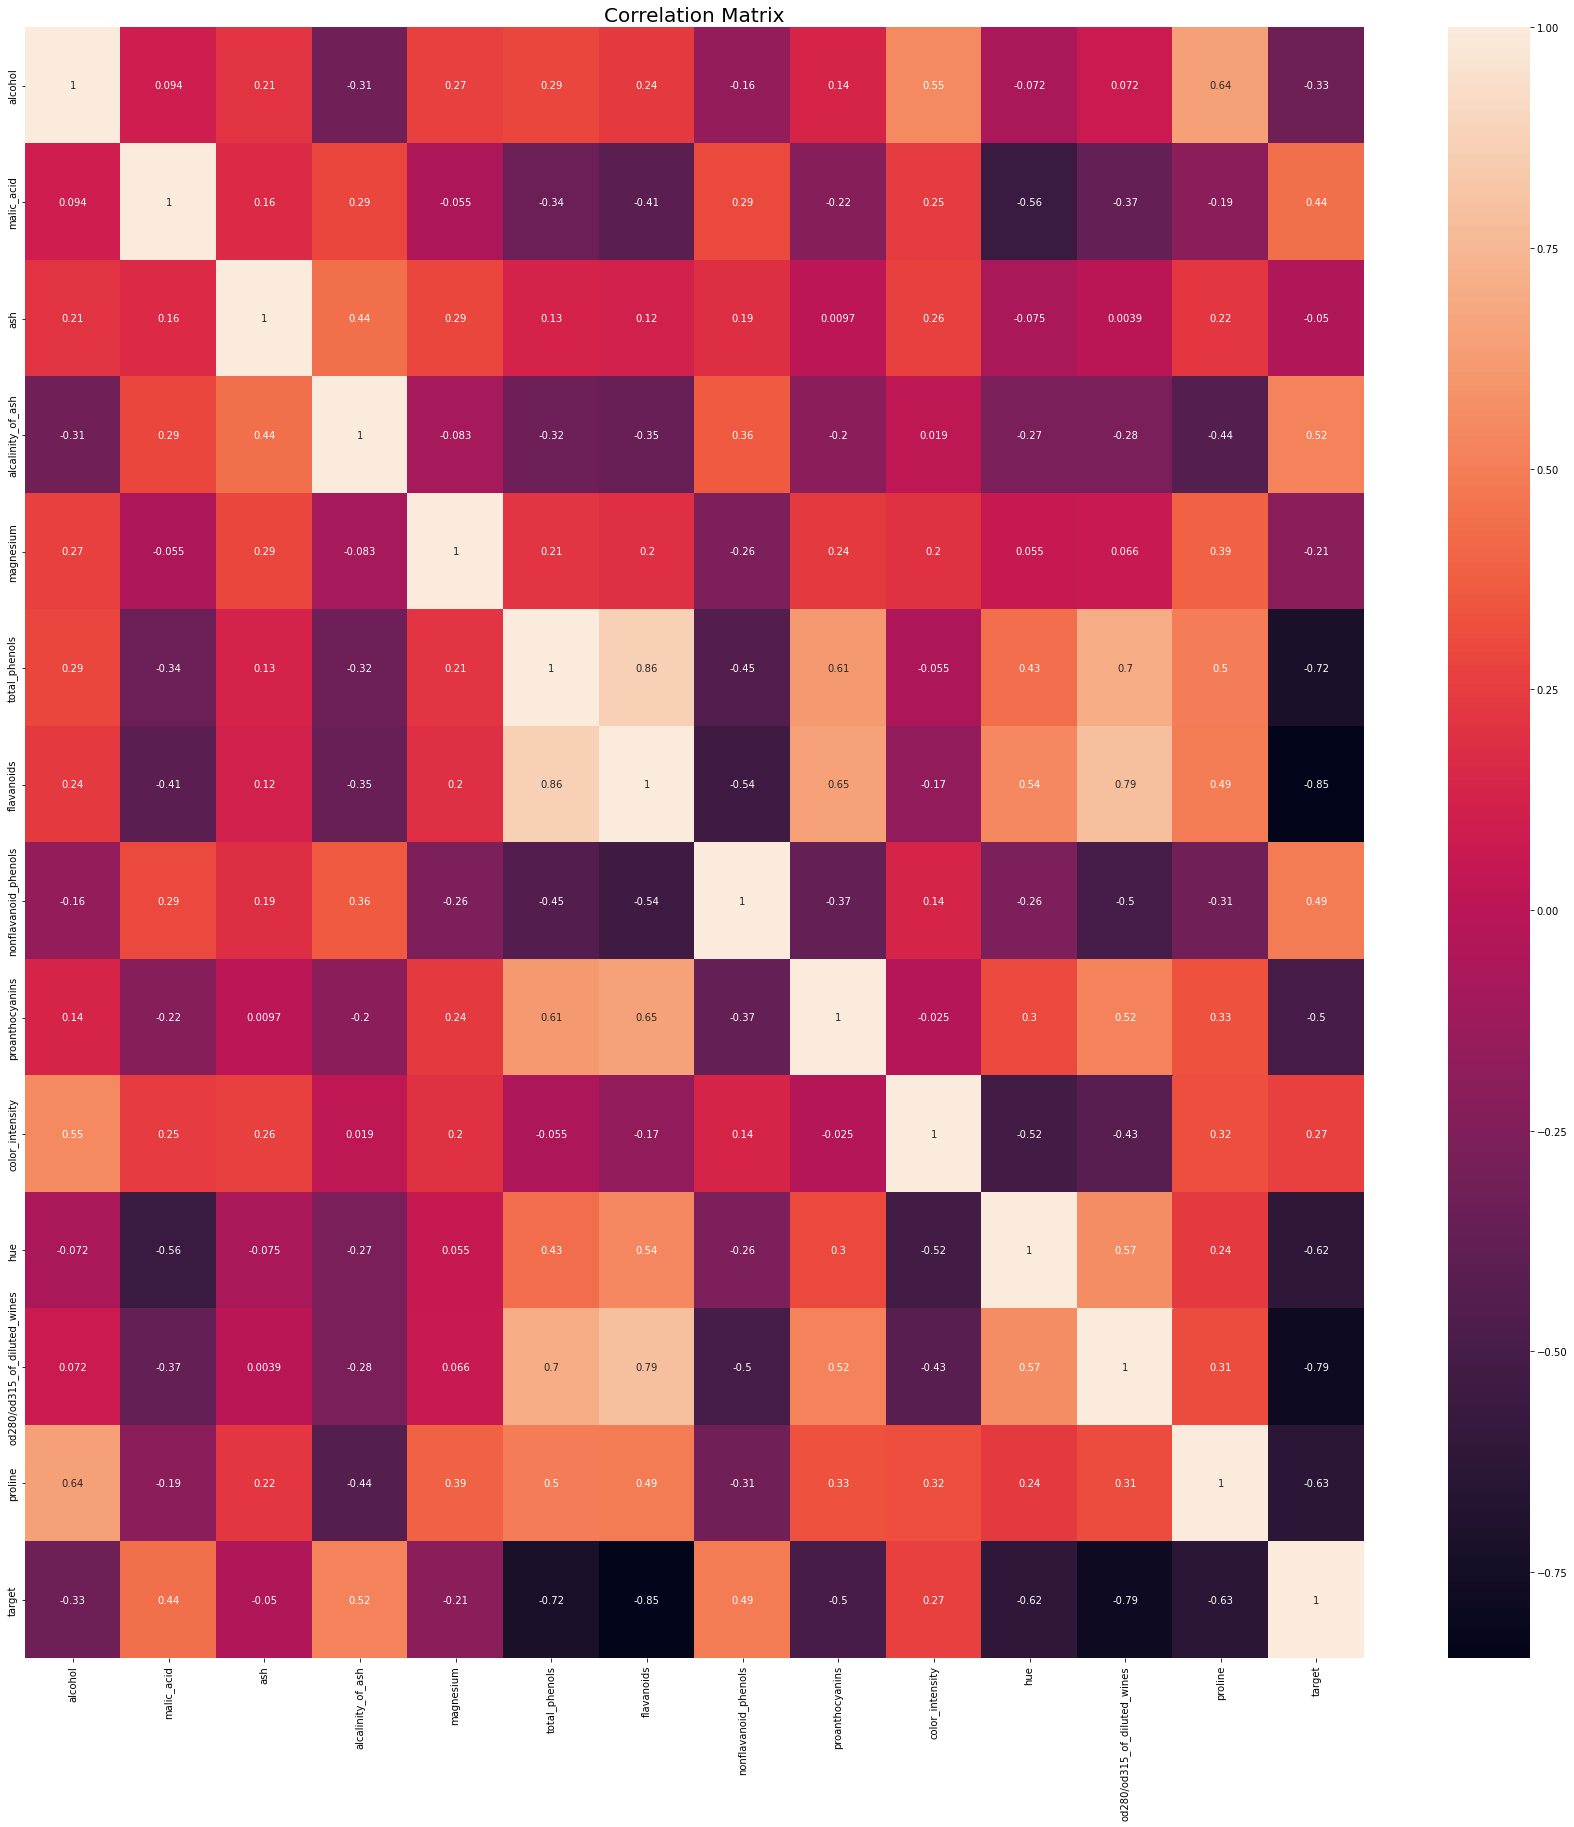

In [30]:
''' Correlation Matrix '''
plt.figure(figsize = (30, 30))
sns.heatmap(wine_data.corr(), annot = True)
plt.title('Correlation Matrix', fontsize=20);

In [74]:
# Split the data into training and testing set
training_data = wine_data_shuffle.drop('target',1)
training_label = wine_data_shuffle['target']

x_train = training_data[:-20]
x_test = training_data[-20:]

y_train = training_label[:-20]
y_test = training_label[-20:]

In [75]:
# Display the training and testing data shapes

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (158, 13)
y_train shape: (158,)
x_test shape: (20, 13)
y_test shape: (20,)


In [23]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

In [28]:
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9


In [76]:
# Train the dtaa with different models: RandomForestClassifier , MLPClassifier, DecisionTreeClassifier.
# Save each model into pickle format for inference

model_list = [RandomForestClassifier(), MLPClassifier(), DecisionTreeClassifier()]
for i in model_list:
    print(f"Training on {i} model")
    model = i.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy Score on {i} is: {accuracy_score(y_test, y_pred)*100}% \n")
    pickle.dump(model, open(f'models/{i}.pickle', 'wb'))

Training on RandomForestClassifier() model
Accuracy Score on RandomForestClassifier() is: 95.0% 

Training on MLPClassifier() model
Accuracy Score on MLPClassifier() is: 85.0% 

Training on DecisionTreeClassifier() model
Accuracy Score on DecisionTreeClassifier() is: 85.0% 



C:\Users\savadogo_abdoul\Anaconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
x_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0
85,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0


In [78]:
y_test

21     0.0
67     1.0
9      0.0
142    2.0
164    2.0
125    1.0
51     0.0
166    2.0
160    2.0
85     1.0
152    2.0
38     0.0
117    1.0
43     0.0
135    2.0
35     0.0
77     1.0
30     0.0
94     1.0
7      0.0
Name: target, dtype: float64